Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

Instructions

* Import roc_curve from sklearn.metrics.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
* Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

[predict_proba is logreg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[same](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier.predict_proba)

predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form. The number of probabilities for each row is equal to the number of categories in target variable (2 in your case).

Does it mean, the probability of occurance of 0 is 0.237… and 1 is 0.762…?

Yes, here 0,237… is the probability that the output will be 0 and 0.762… is the probability of output being 1.

Suppose you only want the probability of getting the output either as 0 or 1, you can do some changes in your code and you will get only one output for each observation. You can use the following code:

model.predict_proba(test)[:,1]
Here,
model is the trained model (name may vary in your case, so change it accordingly)
test is the dataset i made predictions for (change it according to your dataset)

Using [:,1] in the code will give you the probabilities of getting the output as 1. If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#print(y_pred_prob)
# Assuming your target is (0,1), then the classifier would output a probability matrix of dimension (N,2). 
# The first index refers to the probability that the data belong to class 0, and 
# the second refers to the probability that the data belong to class 1.

# These two would sum to 1.

# You can then output the result by:

# probability = model.predict_proba(X)[:,1]
# If you have k classes, the output would be (N,k), you would have to specify the probability of which class you want.

In [3]:
X = df.drop(['Outcome'],1)
y = df.Outcome

In [4]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[175  31]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.68      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



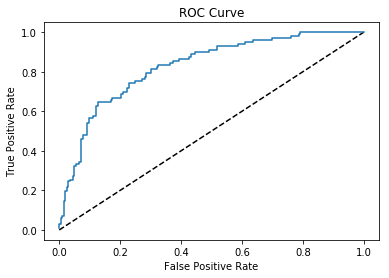

In [6]:
# Import necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)

y_pred_prob=y_pred_prob[:,1]


# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(c)

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()